# M09: Embedding


## Data

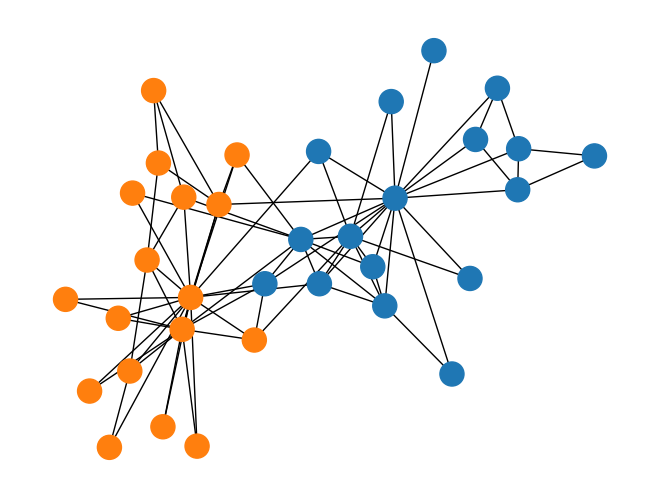

In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns

# Create a small example network
G = nx.karate_club_graph()
A = nx.adjacency_matrix(G).toarray()
labels = np.unique([d[1]['club'] for d in G.nodes(data=True)], return_inverse=True)[1]
cmap = sns.color_palette()
nx.draw(G, with_labels=False, node_color=[cmap[i] for i in labels])

# Section 1: Compute the eigenvectors and eigenvalues of A

To compute the eigenvectors and eigenvalues of the adjacency matrix A, we can use the `np.linalg.eig` function from NumPy.

```python
import numpy as np 
eigvals, eigvecs = np.linalg.eig(A)
```

This function returns two arrays:
- `eigvals`: An array of eigenvalues
- `eigvecs`: An array where each column is an eigenvector

To find the $d$ largest eigenvalues, we sort the eigenvectors by their corresponding eigenvalues in descending order:
```python
idx = eigvals.argsort()[::-1]
eigvals = eigvals[idx]
eigvecs = eigvecs[:, idx]
```

Now you have the eigenvectors and eigenvalues of A, which can be used for spectral embedding.


In [ ]:
# Compute the spectral decomposition
eigvals, eigvecs = np.linalg.eig(A)

# Find the top d eigenvectors
d = 2
sorted_indices = np.argsort(eigvals)[::-1][:d]
eigvals = eigvals[sorted_indices]
eigvecs = eigvecs[:, sorted_indices]

In [ ]:
x = ... # set the x coordinates of the points using the first eigenvector
y = ... # set the y coordinates of the points using the second eigenvector

# Plot the results
import seaborn as sns
fig, ax = plt.subplots(figsize=(7, 5))
sns.scatterplot(x = x, y = y, hue=labels, ax=ax)
ax.set_title('Spectral Embedding')
ax.set_xlabel('Eigenvector 1')
ax.set_ylabel('Eigenvector 2')
plt.show()

# Section 2: Compute the Laplacian matrix and its eigenvectors

1. Define the Laplacian matrix as


$$
\mathbf{L} = \begin{bmatrix}
k_1 & -A_{12} & \cdots & -A_{1n} \\
-A_{21} & k_2 & \cdots & -A_{2n} \\
\vdots & \vdots & \ddots & \vdots \\
-A_{n1} & -A_{n2} & \cdots & k_n
\end{bmatrix}
$$

2. Compute the smallest, second smallest, and third smallest eigenvalues and their corresponding eigenvectors.

3. Confirm that the smallest eigenvector is parallel to the all-ones vector.

4. Confirm that the second smallest eigenvector is orthogonal to the all-ones vector.

5. Form a 2D embedding using the second and third smallest eigenvectors and plot it.



In [ ]:
L = ... # define the Laplacian matrix

eigvals, eigvecs = ... # compute the eigenvalues and eigenvectors

# Find the top d eigenvectors
d = 3
sorted_indices = ...
eigvals = eigvals[sorted_indices]
eigvecs = eigvecs[:, sorted_indices]

In [2]:
# Confirm that the smallest eigenvector is parallel to the all-ones vector (i.e., x1.T @ np.ones(N) = 0)


In [3]:
# Confirm that the second smallest eigenvector is orthogonal to the all-ones vector (i.e., x2.T @ x1 = 0)

In [4]:
# Form a 2D embedding using the second and third smallest eigenvectors and plot it.

# Section 3: Generate an embedding based on the normalized cut

1. Express the normalized cut objective function in terms of vector $x$ and a matrix $M$ (Hint: $M$ is something we already learned) 

2. Compute the eigenvectors and eigenvalues of $M$ 

3. Form a 2D embedding and plot it.

# Section 4: Modularity-based embedding

1. Compute the modularity matrix $Q$

2. Compute the eigenvectors and eigenvalues of $Q$

3. Form a 2D embedding and plot it.

# Section 5: Word2Vec

In [ ]:
import gensim
import gensim.downloader
from gensim.models import Word2Vec

# Load pre-trained word2vec model from Google News
model = gensim.downloader.load('word2vec-google-news-300')

In [ ]:
# Example usage
word = "king"
similar_words = model.most_similar(word)
print(f"Words most similar to '{word}':")
for similar_word, similarity in similar_words:
    print(f"{similar_word}: {similarity:.4f}")

A cool (yet controversial) application of word embeddings is analogy solving. Let us consider the following puzzle:

> man is to woman as king is to ___ ?

In [ ]:
# We solve the puzzle by
#
#  vec(king) - vec(man) + vec(woman)
#
# To solve this, we use the model.most_similar function, with positive words being "king" and "woman" (additive), and negative words being "man" (subtractive).
#
model.most_similar(positive=['woman', "king"], negative=['man'], topn=5)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA

countries = ['Germany', 'France', 'Italy', 'Spain', 'Portugal', 'Greece']
capital_words = ['Berlin', 'Paris', 'Rome', 'Madrid', 'Lisbon', 'Athens']

# Get the word embeddings for the countries and capitals
country_embeddings = np.array([model[country] for country in countries])
capital_embeddings = np.array([model[capital] for capital in capital_words])

# Compute the PCA
pca = PCA(n_components=2)
embeddings = np.vstack([country_embeddings, capital_embeddings])
embeddings_pca = pca.fit_transform(embeddings)

# Create a DataFrame for seaborn
df = pd.DataFrame(embeddings_pca, columns=['PC1', 'PC2'])
df['Label'] = countries + capital_words
df['Type'] = ['Country'] * len(countries) + ['Capital'] * len(capital_words)

# Plot the data
plt.figure(figsize=(12, 10))

# Create a scatter plot with seaborn
scatter_plot = sns.scatterplot(data=df, x='PC1', y='PC2', hue='Type', style='Type', s=200, palette='deep', markers=['o', 's'])

# Annotate the points
for i in range(len(df)):
    plt.text(df['PC1'][i], df['PC2'][i] + 0.08, df['Label'][i], fontsize=12, ha='center', va='bottom',
             bbox=dict(facecolor='white', edgecolor='none', alpha=0.8))

# Draw arrows between countries and capitals
for i in range(len(countries)):
    plt.arrow(df['PC1'][i], df['PC2'][i], df['PC1'][i + len(countries)] - df['PC1'][i], df['PC2'][i + len(countries)] - df['PC2'][i],
              color='gray', alpha=0.6, linewidth=1.5, head_width=0.02, head_length=0.03)

plt.legend(title='Type', title_fontsize='13', fontsize='11')
plt.title('PCA of Country and Capital Word Embeddings', fontsize=16)
plt.xlabel('Principal Component 1', fontsize=14)
plt.ylabel('Principal Component 2', fontsize=14)
ax = plt.gca()
ax.set_axis_off()
